<h1>Prediction of customer churn in a telecommunications company

In [105]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv(r'C:\Users\lour2\Desktop\LOURDES\data science\Proyecto Machine Learning\data\raw\IBM_CHURN.csv', index_col = 'Unnamed: 0')

#### About the dataset:

Each row represents a customer, each column contains customer’s attributes described as follows:
- CustomerID : customer identification number
- Gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- Tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- Churn: Whether the customer churned or not in the last month (Yes or No)



<h3> 1. Let's load the Dataset and take an overview of it

In [107]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn Reason
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NaN
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,NaN
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Competitor made better offer
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,NaN
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Moved


In [108]:
df.shape

(7043, 22)

Changing the order of the columns , and placing Churn at the end

In [109]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn Reason'],
      dtype='object')

In [110]:
orden =['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn Reason',
       'Churn']
df = df[orden]

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 
 17  

In [112]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Convert Dtypes

In [113]:
#TotalCharges is a numerical feature, but it's read as object
mask = df[df['TotalCharges'] == ' ']
mask_index = mask.index
df.loc[mask_index, 'TotalCharges'] = 0


In [114]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

<h3> 2. Missing values

The only column with Nan values is 'Churn Reason', let's see how to solve it

In [115]:
# checking the percentage of Nan in the column
df['Churn Reason'].isna().sum()*100/len(df['Churn Reason'])

73.46301292063042

In [116]:
# the percentage of Nan is very high so we drop the column
df = df.drop('Churn Reason', axis=1)

<h3> 3. Univariate analysis

Let's check if the target ('Churn') is balanced

In [117]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

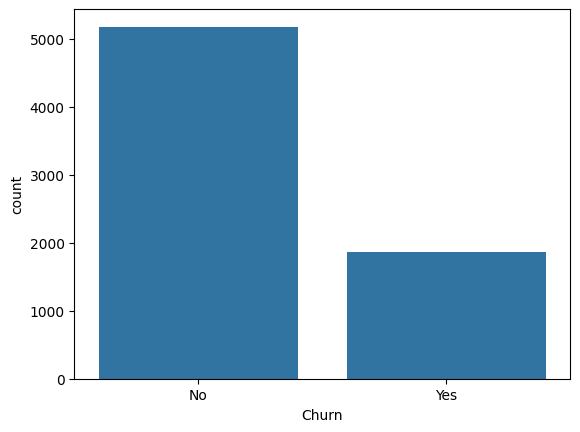

In [118]:
sns.countplot(x="Churn", data=df)

We see it is highly unbalanced, we will have to use the appropriate metric (precision , f1-score)

Now let's take a look to the other main variables

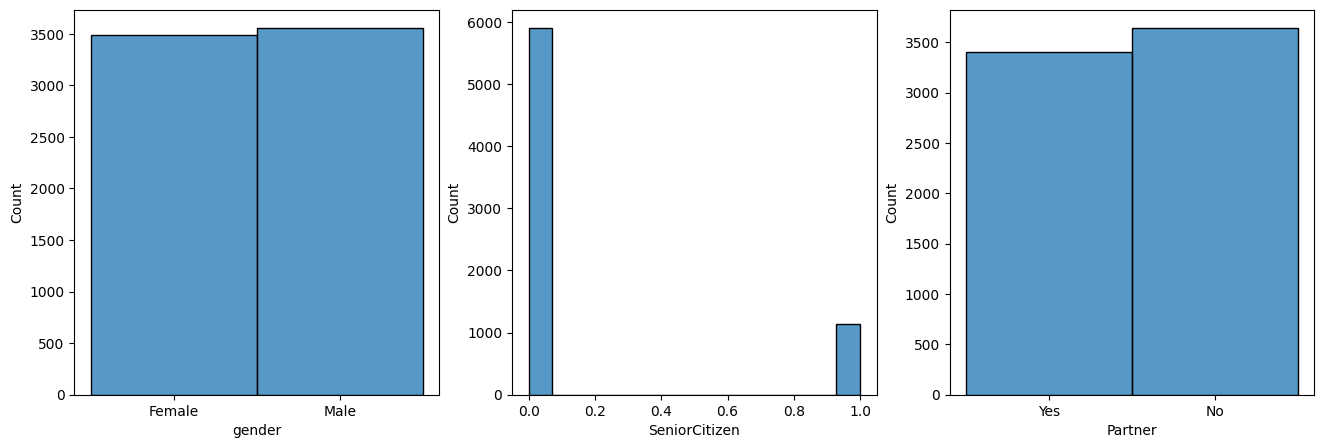

In [119]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.histplot(df['gender'], ax=axes[0])
sns.histplot(df['SeniorCitizen'], ax=axes[1])
sns.histplot(df['Partner'], ax=axes[2]);

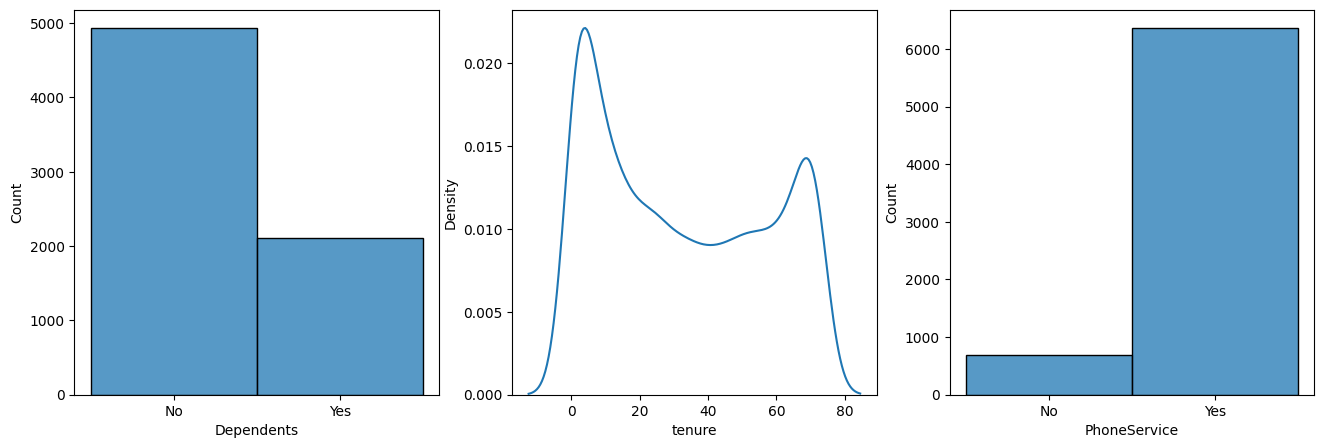

In [120]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.histplot(df['Dependents'], ax=axes[0])
sns.kdeplot(data = df['tenure'], ax=axes[1])
sns.histplot(df['PhoneService'], ax=axes[2]);

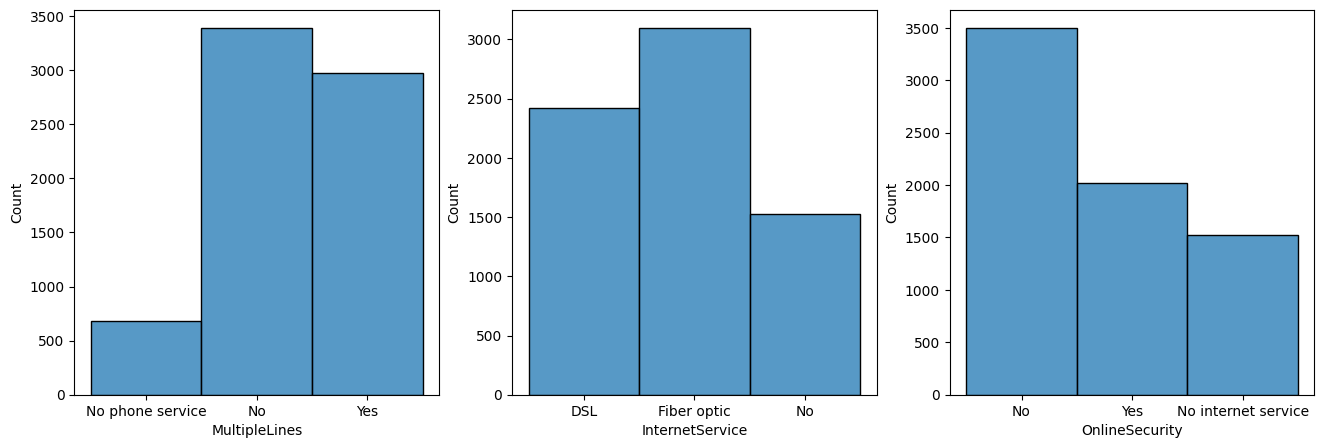

In [121]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.histplot(df['MultipleLines'], ax=axes[0])
sns.histplot(df['InternetService'], ax=axes[1])
sns.histplot(df['OnlineSecurity'], ax=axes[2]);

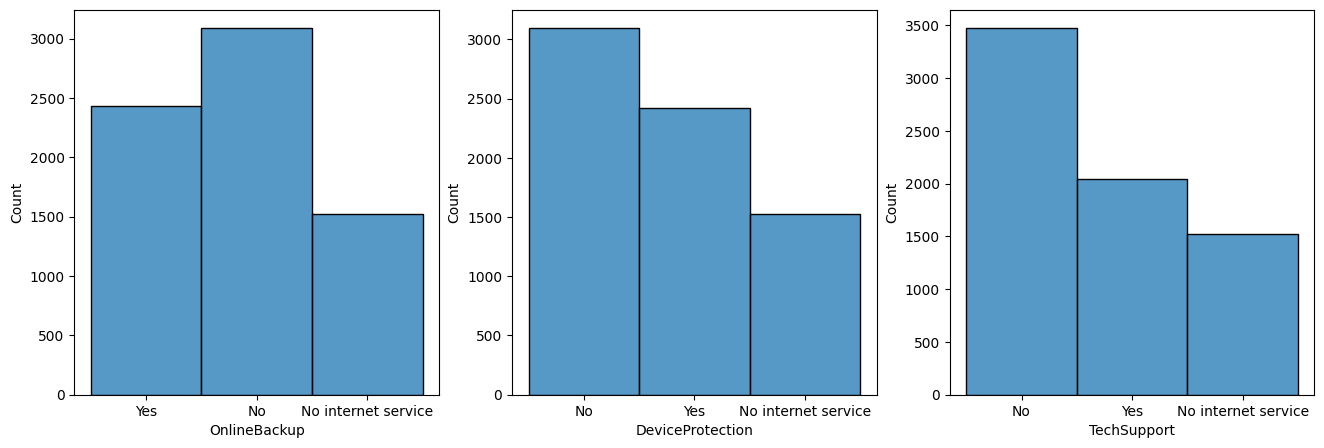

In [122]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.histplot(df['OnlineBackup'], ax=axes[0])
sns.histplot(df['DeviceProtection'], ax=axes[1])
sns.histplot(df['TechSupport'], ax=axes[2]);

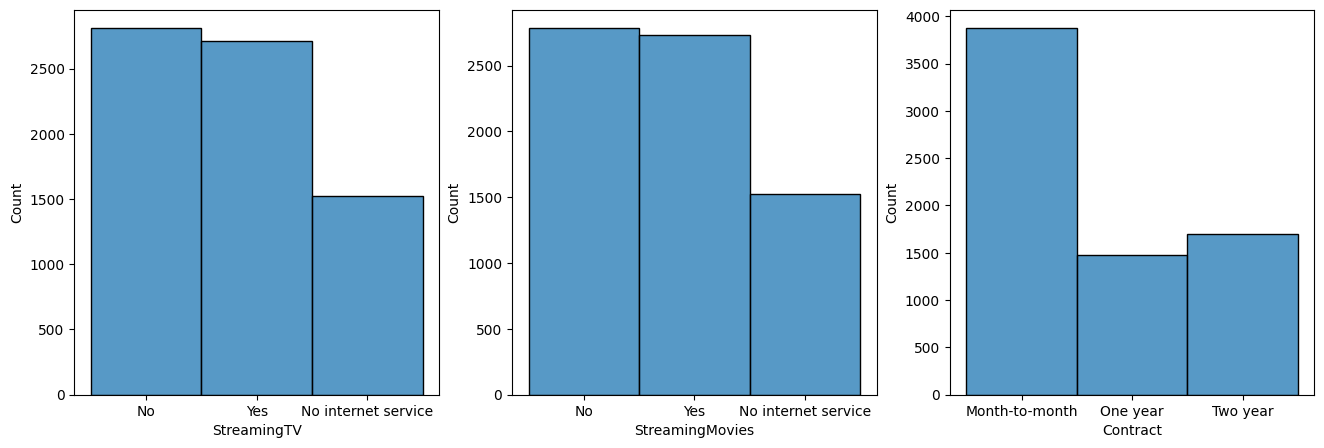

In [123]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.histplot(df['StreamingTV'], ax=axes[0])
sns.histplot(df['StreamingMovies'], ax=axes[1])
sns.histplot(df['Contract'], ax=axes[2]);

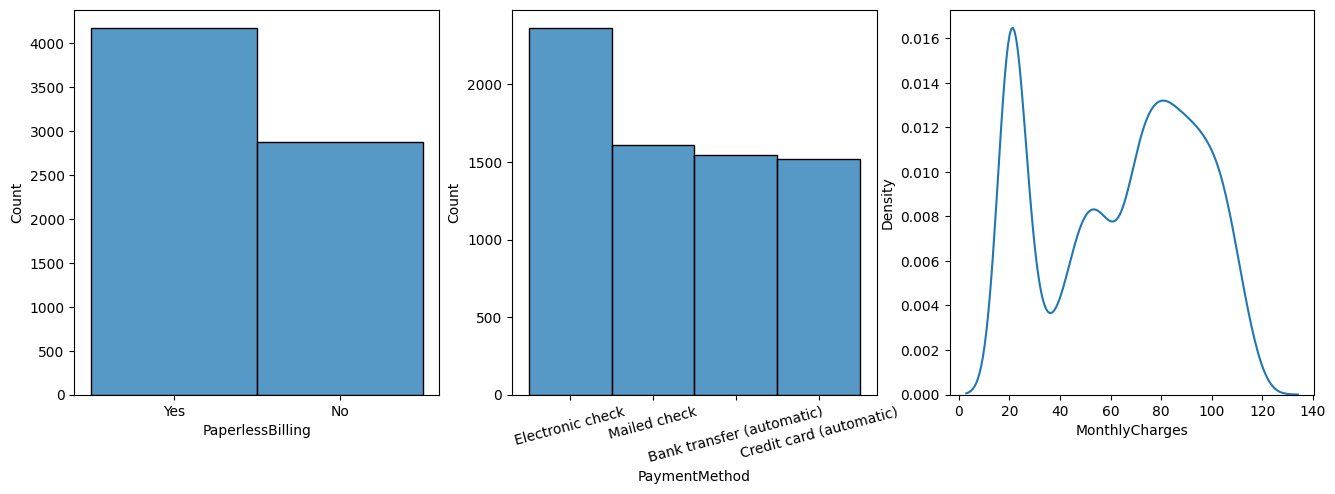

In [124]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.histplot(df['PaperlessBilling'], ax=axes[0])
sns.histplot(df['PaymentMethod'], ax=axes[1])
axes[1].tick_params(axis='x', rotation=15)
sns.kdeplot(df['MonthlyCharges'], ax=axes[2]);

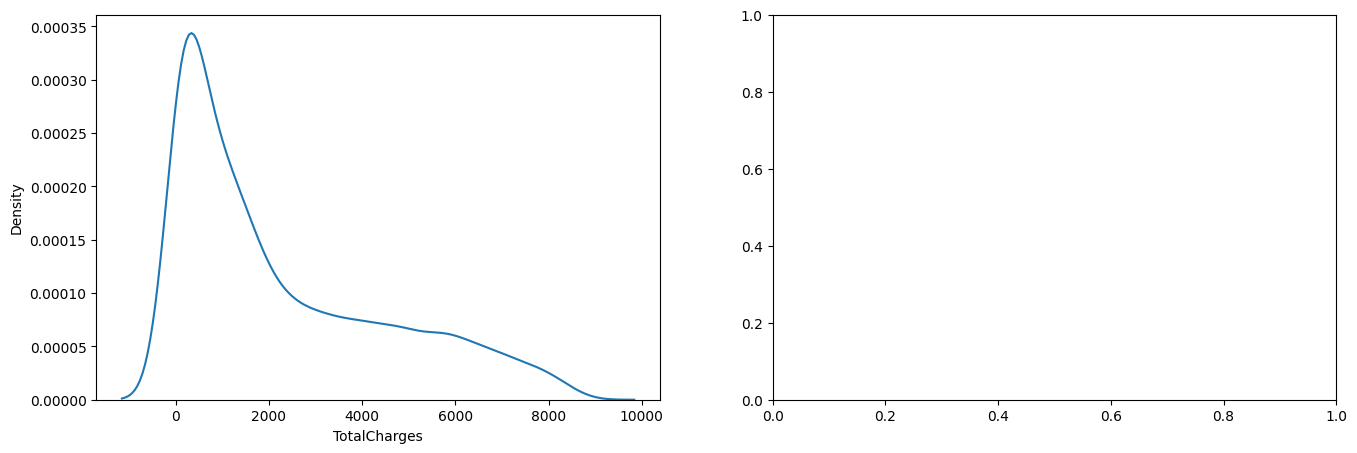

In [125]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.kdeplot(df['TotalCharges'], ax= axes[0]);

Conclusions:
- From the graphic tenure we see that most of the clients leave within the first year
- StreaminTV and StreamingMovies have almost the same distribution, so it seems that the column is redundant

Actions:
- Tenure, MonthlyCharges and TotalCharges is not normally distributed and symmetric, we will have to transform the data of this column 
- We could simplify PaymentMethod values to 'automatic' and 'non automatic'



In [126]:
from scipy.stats import shapiro
from scipy.stats import skew

# much below the significance level (0.05) is not considered a normal distribution.
print("Saphiro:", shapiro(df.tenure).pvalue)
print("Saphiro:", shapiro(df.MonthlyCharges.values).pvalue)
print("Saphiro:", shapiro(df.TotalCharges).pvalue)

# To check the asymmetry of a variable we can always calculate its skew value
# 0 if symmetrical, >0 tail to the right, <0 tail to the left


print("Asymmetry:", skew(df.tenure))
print("Asymmetry:", skew(df.MonthlyCharges))
print("Asymmetry:", skew(np.log(df.TotalCharges)))

Saphiro: 0.0
Saphiro: 0.0
Saphiro: 0.0
Asymmetry: 0.2394887299846216
Asymmetry: -0.2204774644391769
Asymmetry: nan


c:\Users\lour2\miniconda3\envs\deep_learning\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\lour2\miniconda3\envs\deep_learning\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\lour2\miniconda3\envs\deep_learning\lib\site-packages\scipy\stats\_stats_py.py:1070: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


In [127]:
payment = {'Electronic check':'Non automatic', 'Mailed check':'Non automatic', 'Bank transfer (automatic)':'Automatic', 'Credit card (automatic)': 'Automatic'}
df['PaymentMethod'] = df['PaymentMethod'].map(payment)

<Axes: xlabel='PaymentMethod', ylabel='Count'>

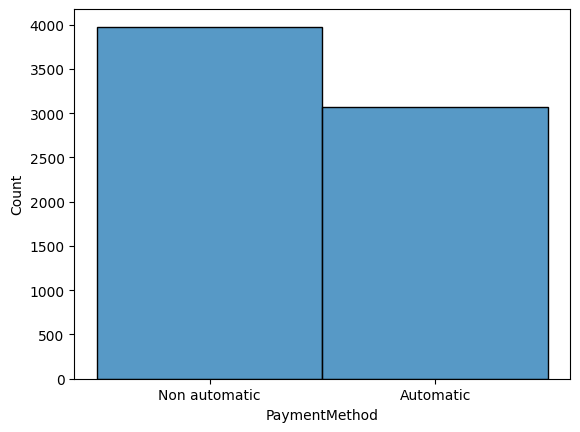

In [128]:
sns.histplot(df['PaymentMethod'])

<h3> 4. Bivariate analysis

Now , lets take a look at all the variables with the target

In [129]:
for columna in df.columns:
    conteo = df[columna].value_counts()
    print(f"Value counts para la columna '{columna}':\n{conteo}\n")

Value counts para la columna 'customerID':
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

Value counts para la columna 'gender':
gender
Male      3555
Female    3488
Name: count, dtype: int64

Value counts para la columna 'SeniorCitizen':
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Value counts para la columna 'Partner':
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Value counts para la columna 'Dependents':
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Value counts para la columna 'tenure':
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

Value counts para la columna 'PhoneService':
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Value count

Let's plot how the target is distributed in every column

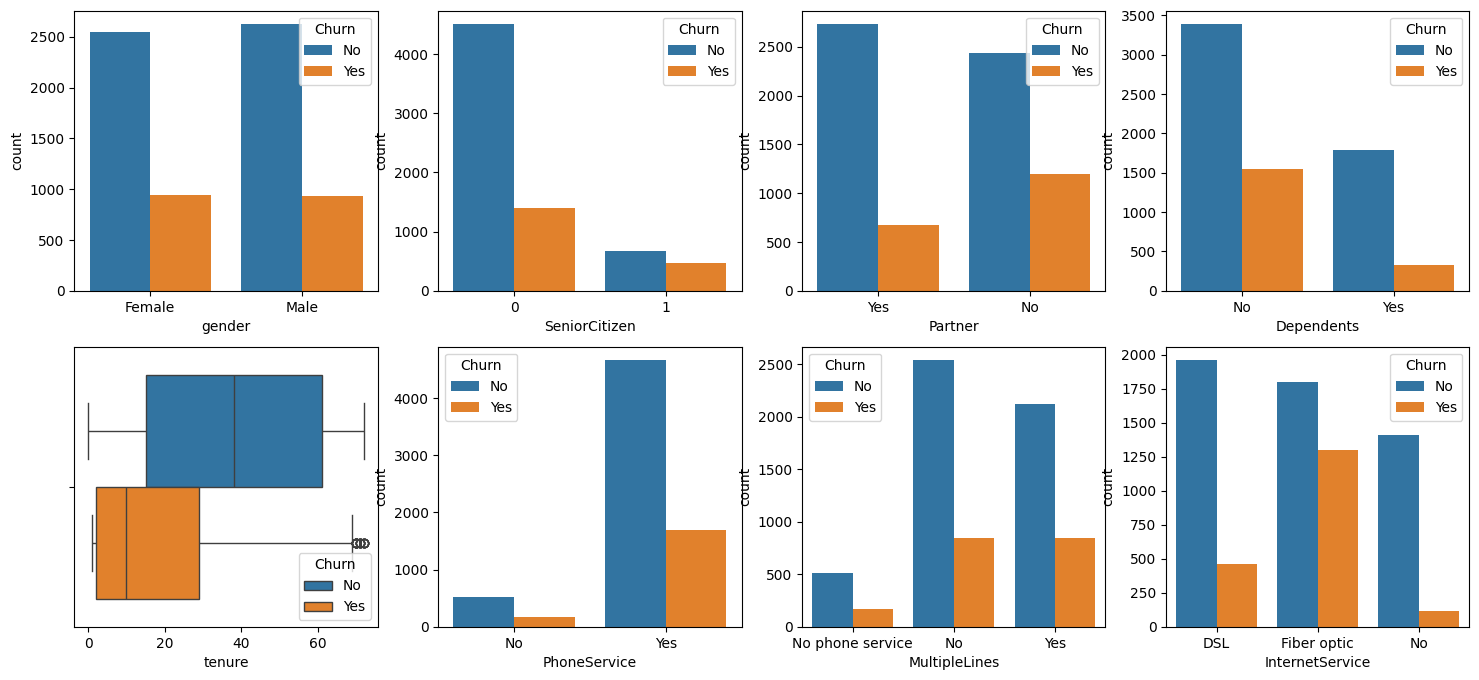

In [130]:
plt.figure(figsize=(18, 8))
plt.subplot(2, 4, 1)
sns.countplot(x='gender', hue='Churn', data=df)
plt.subplot(2, 4, 2)
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.subplot(2, 4, 3)
sns.countplot(x='Partner', hue='Churn', data=df)
plt.subplot(2, 4, 4)
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.subplot(2, 4, 5)
sns.boxplot(x='tenure', hue='Churn', data=df)
plt.subplot(2, 4, 6)
sns.countplot(x='PhoneService', hue='Churn', data=df)
plt.subplot(2, 4, 7)
sns.countplot(x='MultipleLines', hue='Churn', data=df)
plt.subplot(2, 4, 8)
sns.countplot(x='InternetService', hue='Churn', data=df);

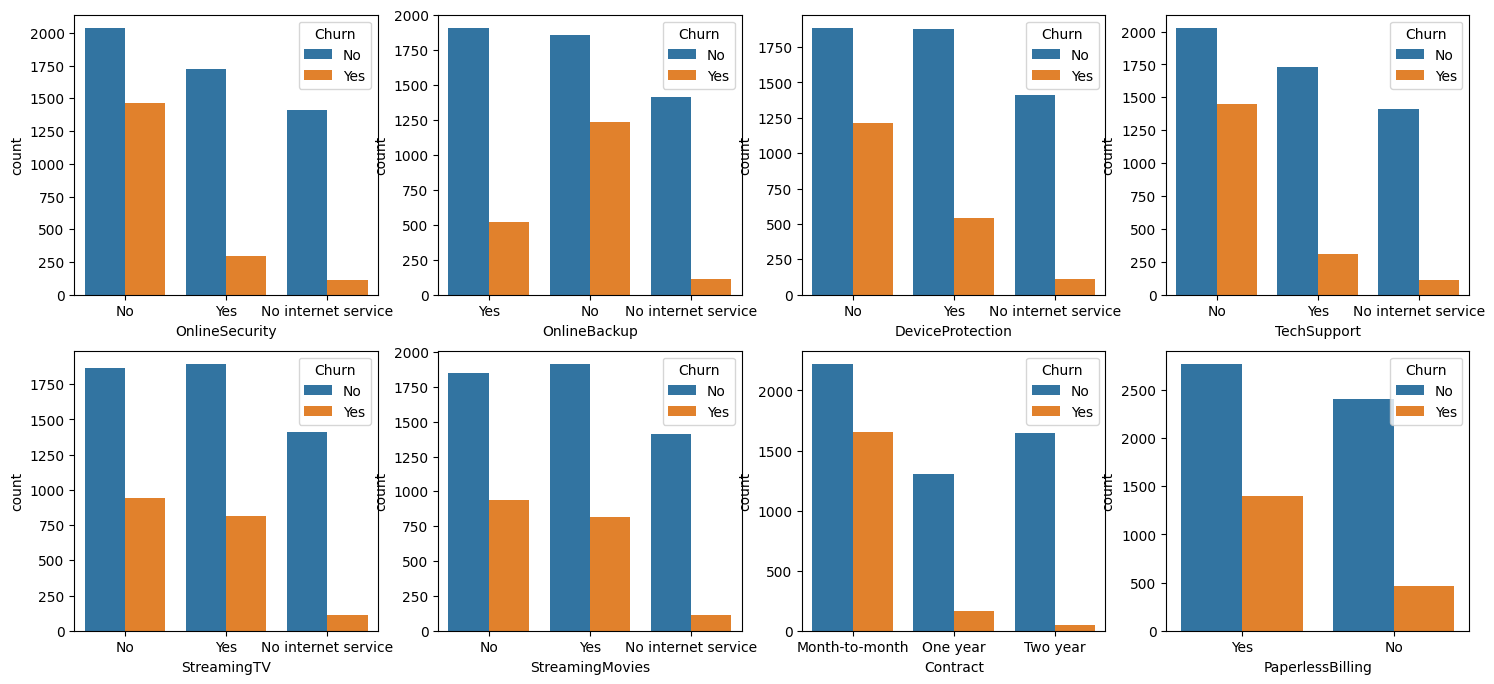

In [131]:
plt.figure(figsize=(18, 8))
plt.subplot(2, 4, 1)
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.subplot(2, 4, 2)
sns.countplot(x='OnlineBackup', hue='Churn', data=df)
plt.subplot(2, 4, 3)
sns.countplot(x='DeviceProtection', hue='Churn', data=df)
plt.subplot(2, 4, 4)
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.subplot(2, 4, 5)
sns.countplot(x='StreamingTV', hue='Churn', data=df)
plt.subplot(2, 4, 6)
sns.countplot(x='StreamingMovies', hue='Churn', data=df)
plt.subplot(2, 4, 7)
sns.countplot(x='Contract', hue='Churn', data=df)
plt.subplot(2, 4, 8)
sns.countplot(x='PaperlessBilling', hue='Churn', data=df);


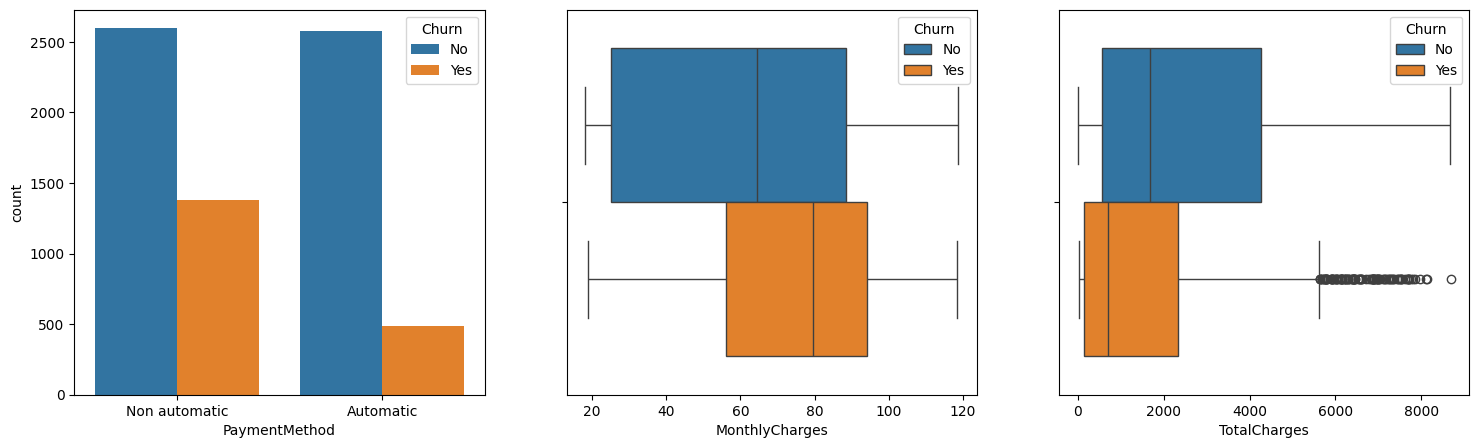

In [132]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.subplot(1, 3, 2)
sns.boxplot(x='MonthlyCharges', hue='Churn', data=df)
plt.subplot(1, 3, 3)
sns.boxplot(x='TotalCharges', hue='Churn', data=df);


Conclusions:
- There might be outliers in TotalCharges column
- Some columns , such us customerId, gender, StreamingTv have no relevant information

Actions:

Outliers<br>
- TotalCharges has a lot of values far from the average

In [133]:
df.loc[:,['TotalCharges','tenure']].sort_values(by = 'TotalCharges')
# They correspond to the clients who have been in the company longer, so the are not outliers

,TotalCharges,tenure
3826,0.00,0
5218,0.00,0
4380,0.00,0
753,0.00,0
488,0.00,0
...,...,...
2187,8564.75,71
5347,8594.40,72
6768,8670.10,72
4586,8672.45,72


In [134]:
# we check that people with 0 TotalCharges are in the first month, so we replace 0 values for 'MonthlyCharges'
mask = df[df['TotalCharges'] == 0]
df.loc[mask.index, 'TotalCharges'] = df.loc[mask.index, 'MonthlyCharges']

Drop columns <br>
Based on the info above, we decide to drop:
- 'customerId' due to its high cardinality
- 'gender': churn is equally distributed by gender, so it does not help to predict
- 'StreamingTV' and 'StreamingMovies' are practically identical



In [135]:
df = df.drop(['customerID', 'gender', 'StreamingTV'], axis = 1)


<h3>5. Encodings

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  PaperlessBilling  7043 non-null   object 
 14  PaymentMethod     7043 non-null   object 
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7043 non-null   float64
 17  

In [137]:
df.Partner = df.Partner.apply(lambda x : 0 if x == 'No' else 1 )
df.Dependents = df.Dependents.apply(lambda x : 0 if x == 'No' else 1)
df.PhoneService = df.PhoneService.apply(lambda x : 0 if x == 'No' else 1)
df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 1, 'Yes': 2})
df.InternetService = df.InternetService.map({'No': 0, 'DSL': 1, 'Fiber optic': 2})
df.OnlineSecurity = df.OnlineSecurity.map({'No internet service': 0, 'No': 1, 'Yes': 2})
df.OnlineBackup = df.OnlineBackup.map({'No internet service': 0, 'No': 1, 'Yes': 2})
df.DeviceProtection = df.DeviceProtection.map({'No internet service': 0, 'No': 1, 'Yes': 2})
df.TechSupport = df.TechSupport.map({'No internet service': 0, 'No': 1, 'Yes': 2})
#df.StreamingTV = df.StreamingTV.map({'No internet service': 0, 'No': 1, 'Yes': 2})
df.StreamingMovies = df.StreamingMovies.map({'No internet service': 0, 'No': 1, 'Yes': 2})
df.Contract = df.Contract.map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df.PaperlessBilling = df.PaperlessBilling.map(lambda x : 0 if x == 'No' else 1)
df.PaymentMethod = df.PaymentMethod.map(lambda x : 0 if x == 'Non automatic' else 1)
df.Churn = df.Churn.map(lambda x : 0 if x == 'No' else 1)


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   int64  
 5   MultipleLines     7043 non-null   int64  
 6   InternetService   7043 non-null   int64  
 7   OnlineSecurity    7043 non-null   int64  
 8   OnlineBackup      7043 non-null   int64  
 9   DeviceProtection  7043 non-null   int64  
 10  TechSupport       7043 non-null   int64  
 11  StreamingMovies   7043 non-null   int64  
 12  Contract          7043 non-null   int64  
 13  PaperlessBilling  7043 non-null   int64  
 14  PaymentMethod     7043 non-null   int64  
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7043 non-null   float64
 17  

<h3> Correlation matrix

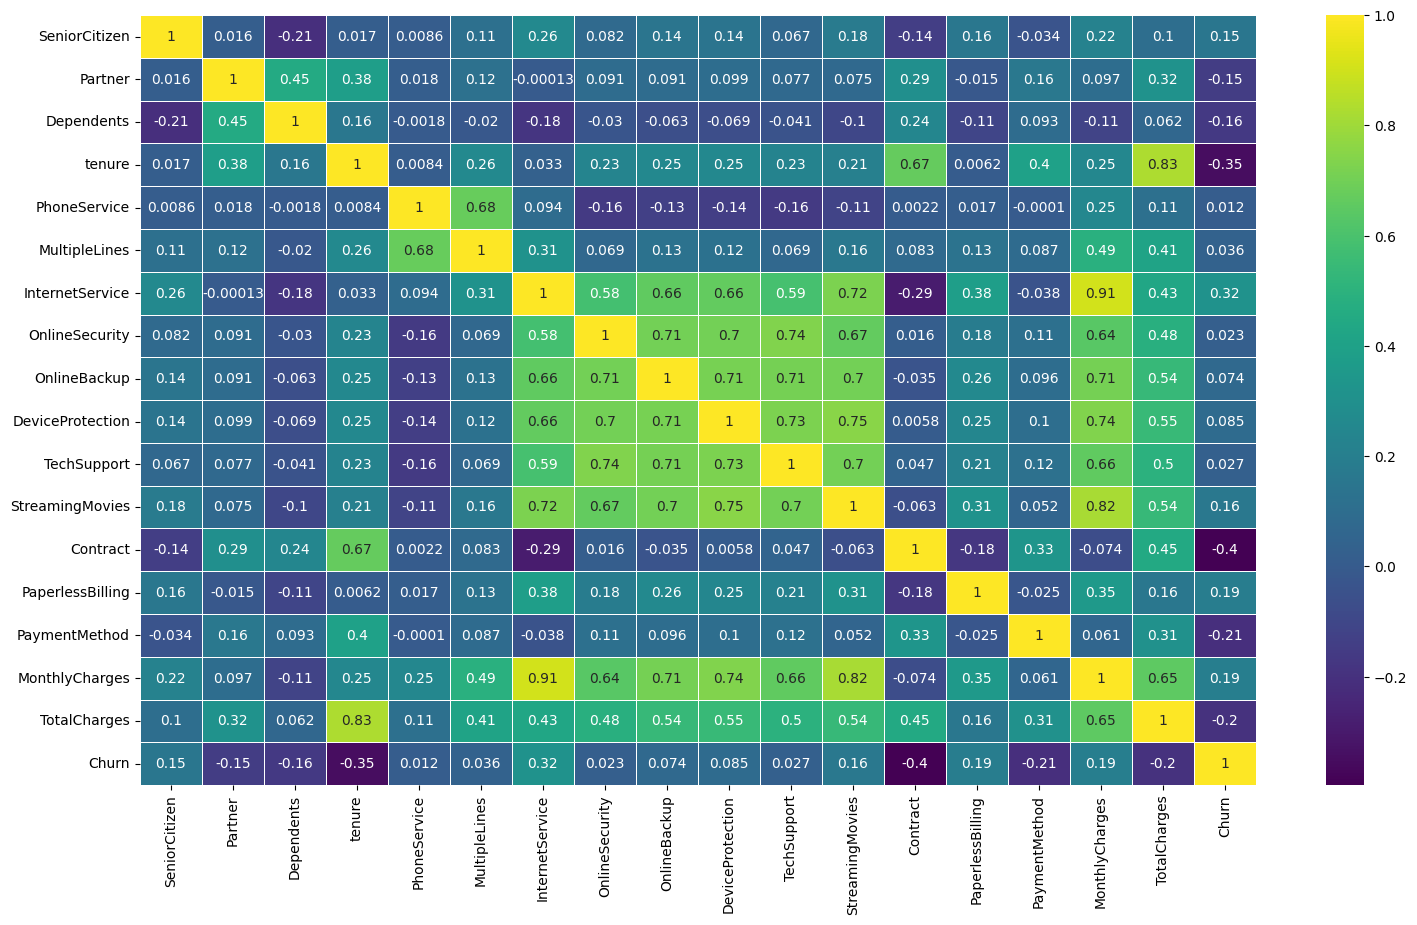

In [139]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),
            cmap='viridis',
            annot=True,
             linewidths=.5);

Deleting columns with low correlation to 'Churn' (< 0.2)

In [140]:
df = df.drop(['SeniorCitizen','Partner', 'Dependents','PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 'MonthlyCharges'], axis = 1)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   int64  
 1   InternetService   7043 non-null   int64  
 2   Contract          7043 non-null   int64  
 3   PaperlessBilling  7043 non-null   int64  
 4   PaymentMethod     7043 non-null   int64  
 5   TotalCharges      7043 non-null   float64
 6   Churn             7043 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 698.2 KB


Tenure and TotalCharges are highly correlated, so I delete TotalCharges since it is less correlated to target than tenure

In [142]:
df = df.drop('TotalCharges', axis=1)

<h3> 6. Model development

<h3> Split values in train and test

In [143]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis = 1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle= True)

<h3> Normalize values

In [144]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Smote technique to balance the target

In [145]:
seed = 42
from imblearn.over_sampling import SMOTE
smo = SMOTE(sampling_strategy="auto", random_state = seed)
X_train, y_train = smo.fit_resample(X_train,y_train)

<h4> Choosing the best model

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

seed = 42

In [147]:
rfc = RandomForestClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier()
ada = AdaBoostClassifier()
lr = LogisticRegression()

In [148]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

rfc.fit(X_train, y_train)
xgb.fit(X_train, y_train)
cat.fit(X_train, y_train)
ada.fit(X_train, y_train)
lr.fit(X_train, y_train)


print('recall_rfc', recall_score(y_test, rfc.predict(X_test)))
print('accuracy_rfc',accuracy_score(y_test, rfc.predict(X_test)))
print('   ')
print('recall_xgb',recall_score(y_test, xgb.predict(X_test)))
print('accuracy_xgb',accuracy_score(y_test, xgb.predict(X_test)))
print('   ')
print('recall_cat',recall_score(y_test, cat.predict(X_test)))
print('accuracy_cat',accuracy_score(y_test, cat.predict(X_test)))
print('   ')
print('recall_ada',recall_score(y_test, ada.predict(X_test)))
print('accuracy_ada',accuracy_score(y_test, ada.predict(X_test)))
print('   ')
print('recall_lr',recall_score(y_test, lr.predict(X_test)))
print('accuracy_lr',accuracy_score(y_test, lr.predict(X_test)))


Learning rate set to 0.024033
0:	learn: 0.6810382	total: 4.37ms	remaining: 4.37s
1:	learn: 0.6703415	total: 8.19ms	remaining: 4.09s
2:	learn: 0.6601620	total: 12.1ms	remaining: 4.02s
3:	learn: 0.6502779	total: 16.2ms	remaining: 4.03s
4:	learn: 0.6410940	total: 20.1ms	remaining: 3.99s
5:	learn: 0.6329954	total: 23.8ms	remaining: 3.94s
6:	learn: 0.6247849	total: 27.7ms	remaining: 3.93s
7:	learn: 0.6181115	total: 31.6ms	remaining: 3.92s
8:	learn: 0.6110626	total: 35.5ms	remaining: 3.91s
9:	learn: 0.6043002	total: 39.3ms	remaining: 3.89s
10:	learn: 0.5978148	total: 43ms	remaining: 3.87s
11:	learn: 0.5928382	total: 47.4ms	remaining: 3.9s
12:	learn: 0.5875555	total: 51.3ms	remaining: 3.89s
13:	learn: 0.5821865	total: 55ms	remaining: 3.88s
14:	learn: 0.5767675	total: 58.7ms	remaining: 3.85s
15:	learn: 0.5717446	total: 62.9ms	remaining: 3.87s
16:	learn: 0.5677822	total: 66.9ms	remaining: 3.87s
17:	learn: 0.5638165	total: 71.1ms	remaining: 3.88s
18:	learn: 0.5597092	total: 75ms	remaining: 3.87s

Let's check if we have overfitting

In [149]:
print(recall_score(y_train, lr.predict(X_train)))
print(accuracy_score(y_train, lr.predict(X_train)))

0.7953232462173315
0.7488308115543328


Scores in train and test are very similar so it seems that we are not overfitting

#### Best model is Logistic Regression with 0.82 recall in test
#### Let's see if we can improve the score adjusting the parameters


<h3> Logistic Regression

In [150]:
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()

pipe = Pipeline(steps=[
    ("selectkbest", SelectKBest()),    
    ("lr", LogisticRegression())
])


lr_param = {'selectkbest__k': [i for i in range(1,7)],             
            'lr__max_iter': [38,40,60,80],
            'lr__C': [0.5, 1, 1.3],
            'lr__tol': [0.0001, 0.00008],
            'lr__warm_start' : [False, True]
            }


grid = GridSearchCV(pipe, lr_param, scoring='recall', cv =7)
grid.fit(X_train, y_train)
grid.best_params_

c:\Users\lour2\miniconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
336 fits failed out of a total of 2016.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
336 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lour2\miniconda3\envs\deep_learning\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lour2\miniconda3\envs\deep_learning\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\lour2\miniconda3\envs\deep_learning\lib\site-packages\sklearn\pipeline.py", line 423, in

{'lr__C': 0.5,
 'lr__max_iter': 38,
 'lr__tol': 0.0001,
 'lr__warm_start': False,
 'selectkbest__k': 2}

In [152]:
log = grid.best_estimator_
log.fit(X_train, y_train)
print(recall_score(y_test, log.predict(X_test)))
print(accuracy_score(y_test, log.predict(X_test)))


0.9024390243902439
0.6578324656885944


### Feature importance

In [61]:
mask = log[0].get_support()
X_k = X.columns[mask]

In [62]:
coeficientes = log[1].coef_[0]
coeficientes
data = {'Importance': coeficientes, 'Column': X_k}
pd.DataFrame(data).sort_values(by='Importance', ascending = False)

,Importance,Column
5,1.063147,InternetService
15,0.807205,TotalCharges
10,0.600991,StreamingMovies
12,0.163708,PaperlessBilling
8,0.139961,DeviceProtection
4,0.104943,MultipleLines
0,0.043852,SeniorCitizen
1,0.031116,Partner
2,-0.079563,Dependents
7,-0.109212,OnlineBackup


## Test score
It is interesting to see both scores (accuracy and recall) because although I want to focus on detecting as many Churns as possible (recall), I don't want my model to be highly biased on that. Predicting all customers to churn gives a recall of 1 but it is not an accurate model. 


In [64]:
log.fit(X_train, y_train)
print(recall_score(y_test, log.predict(X_test)))
print(accuracy_score(y_test, log.predict(X_test)))

#We can see both metrics are balanced, that is a good sign

0.8153310104529616
0.7458589682915286


In [65]:
# overfitting? score in test is similar than in train so it seems that is not overfitted
print(recall_score(y_train, log.predict(X_train)))
print(accuracy_score(y_train, log.predict(X_train)))

0.8151306740027511
0.7669876203576341


#### Predictions

In [66]:
predictions = log.predict(X_test)
predictions

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

#### Confusion matrix

I'm going to focus on recall score, to make sure I detect as many Churns as possible <br>
There is a total of 574 people who really Churn and I: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - correctly detected 472 (82% right) but <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - uncorrectly classified 416 as churn (53% of my Churn predictions are wrong) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - the overall accuracy of Churn and No Churn is 77% <br>
As my goal is to detect Churn in order to not loose customers, I conclude that 82% is a good rate detection <br>


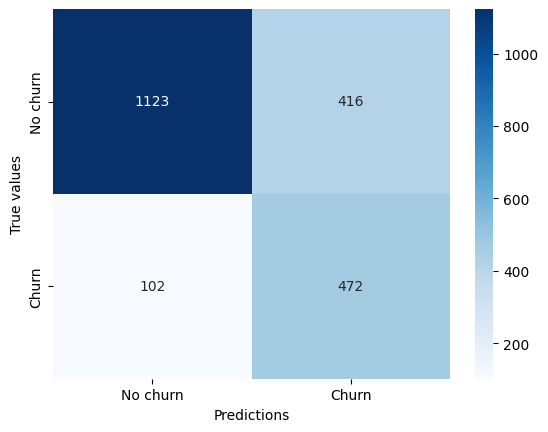

In [ ]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No churn', 'Churn' ], yticklabels=['No churn', 'Churn'])
plt.xlabel('Predictions')
plt.ylabel('True values')
plt.show()

In [ ]:
y_test.value_counts()

Churn
0    1539
1     574
Name: count, dtype: int64

Let's see if we can improve the score by selecting the best columns of the dataset

In [ ]:
selector = SelectKBest(k=6)  # try numbers from 1 to 17 and take the best score
best_train = selector.fit_transform(X_train, y_train)
best_test = selector.transform(X_test)

log.fit(best_train, y_train)
print(recall_score(y_test, log.predict(best_test)))
print(accuracy_score(y_test, log.predict(best_test)))

0.8519163763066202
0.7439659252247989


Which are the k=6 best columns? <br>
tenure, InternetService, Contract, PaperlessBilling, PaymentMethod and TotalCharges

In [ ]:
mask = selector.get_support()
X.columns[mask]

Index(['tenure', 'InternetService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges'],
      dtype='object')

In [ ]:
df = df.loc[:,['tenure', 'InternetService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges']]
df.info()
#df.to_csv()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   int64  
 1   InternetService   7043 non-null   int64  
 2   Contract          7043 non-null   int64  
 3   PaperlessBilling  7043 non-null   int64  
 4   PaymentMethod     7043 non-null   int64  
 5   TotalCharges      7043 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 643.2 KB
